In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import date

os.chdir("../")

from machine_learning.mlMethods import *
from machine_learning.mlSupportMethods import *
from machine_learning.visualization import *

In [2]:
df_input = read_and_get_input_v2(base_path+\
            '/data_sus/finais/input_ml_ocorrencia_doencas_v3.csv')

df_input_ml = df_input[df_input['ano'].isin(
    list(range(2014, 2017, 1)))]
df_previsao_real = df_input[df_input['ano'].isin(
    list(range(2017, 2018, 1)))]
df_previsao_real = df_previsao_real[df_input['mes'].isin(
    list(range(1, 13, 1)))]

columns_filtered = ['nome_bairro', "mes", "data",
                   'temp_solo', 'precipitacao',
                   'max_vizinhos',
                   'IDH', 't-1', 't-2', 't-3', 't-4', 't-5', 't-6',
                   'dengue_diagnosis']

Boolean Series key will be reindexed to match DataFrame index.


In [5]:
df_treino = df_input_ml[columns_filtered]
df_teste = df_previsao_real[columns_filtered]

df_geral = df_treino.append(df_teste)
# df_geral['nome_bairro'].unique()

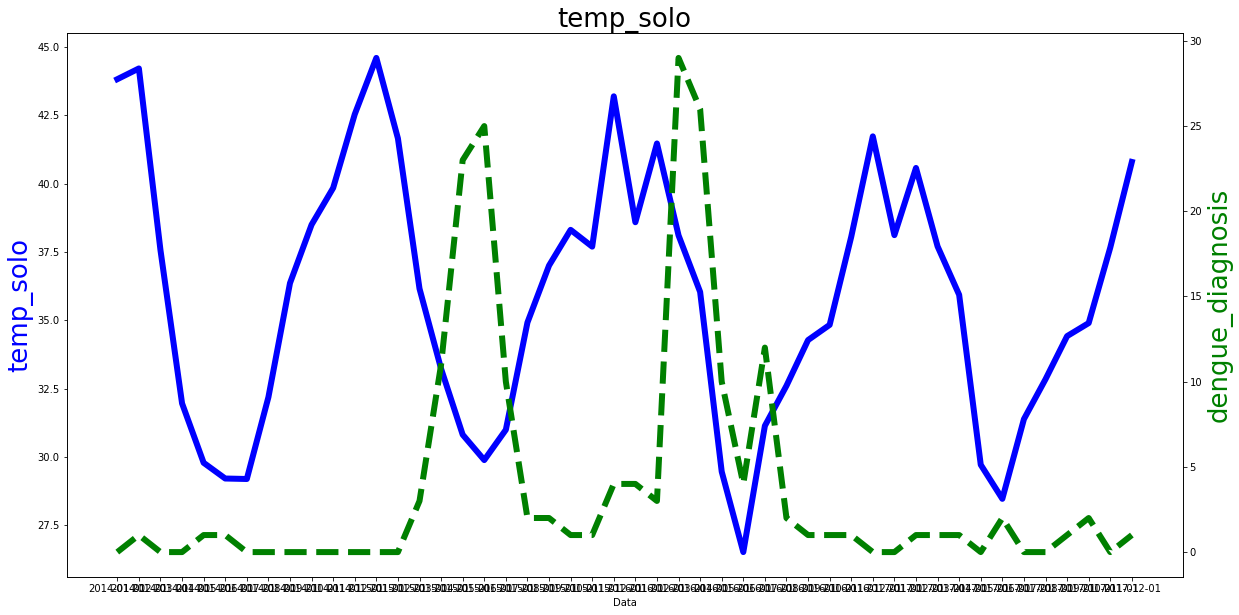

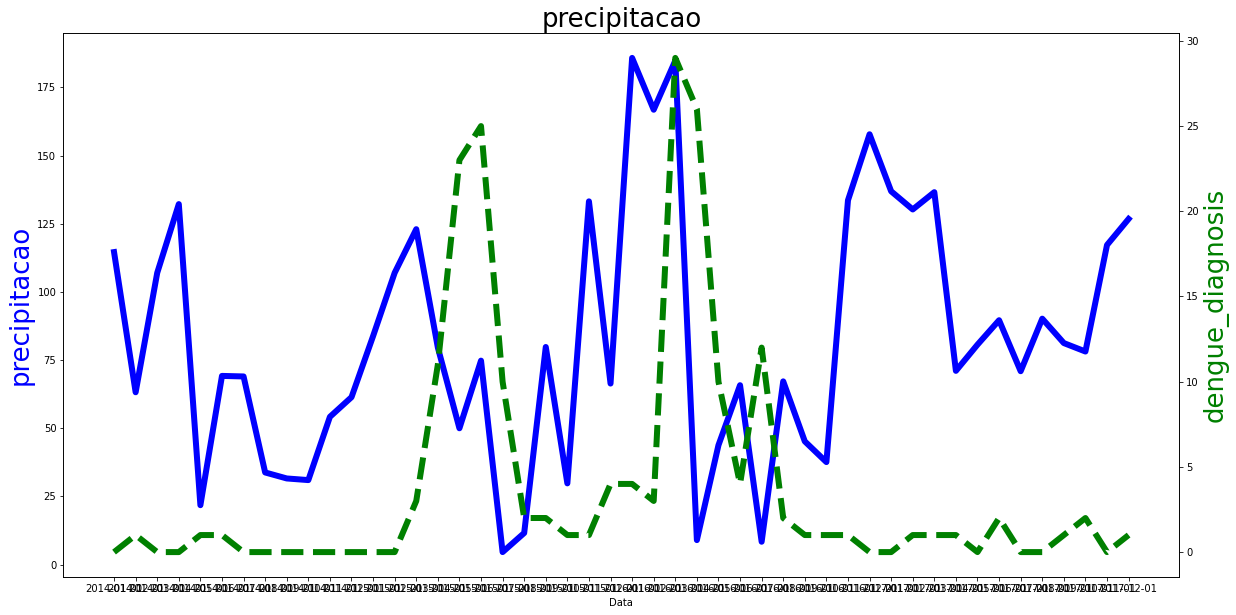

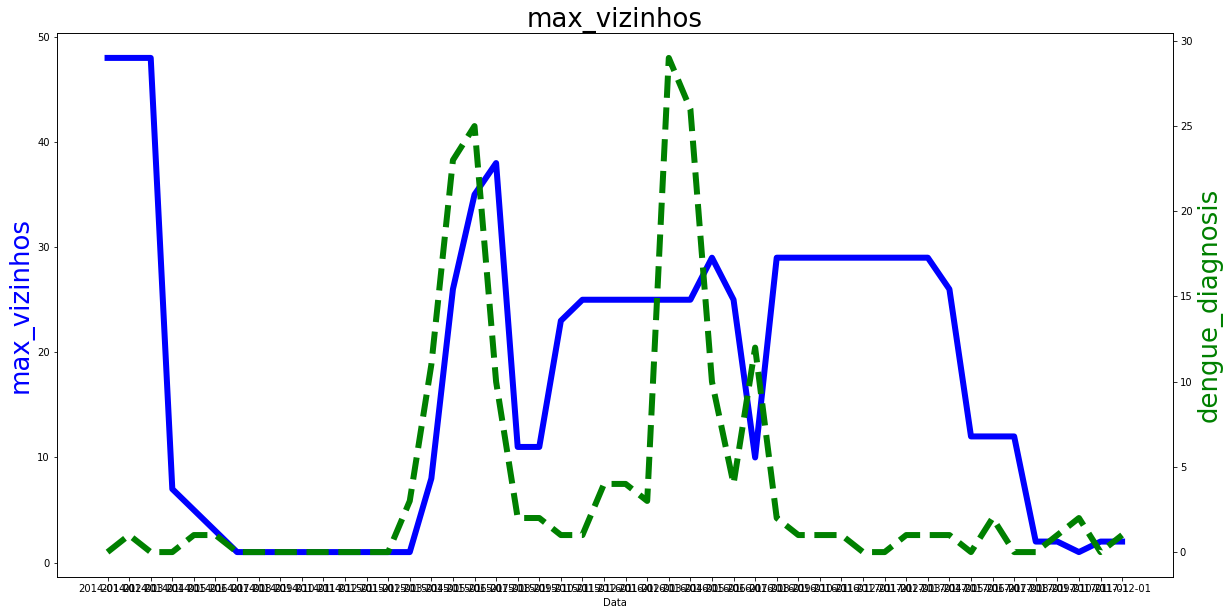

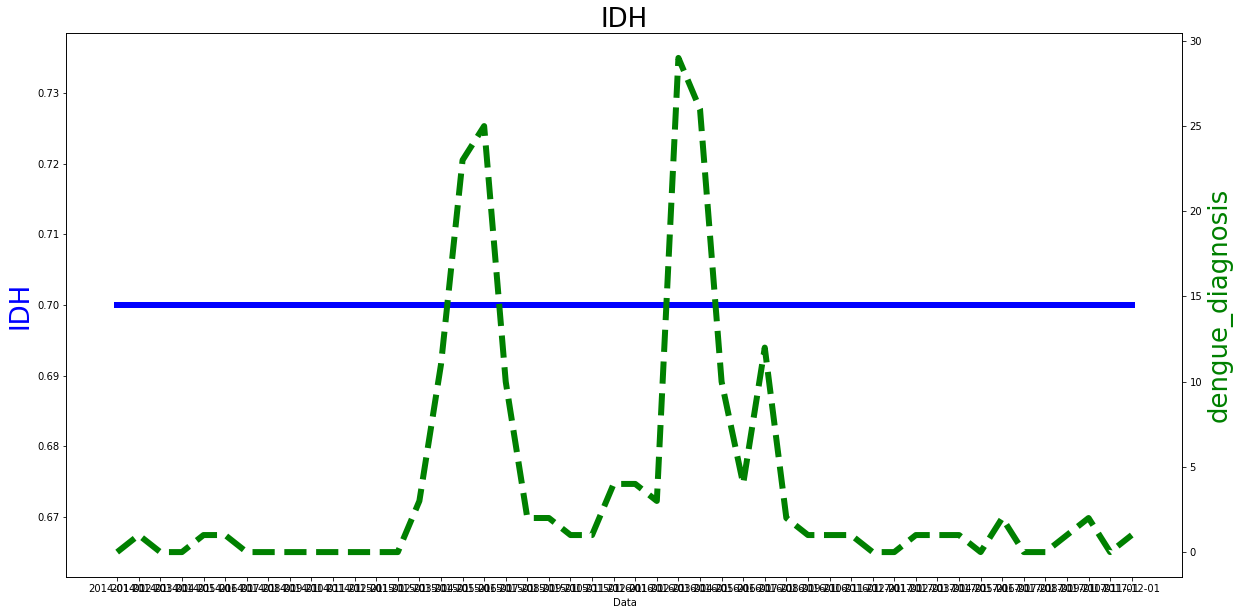

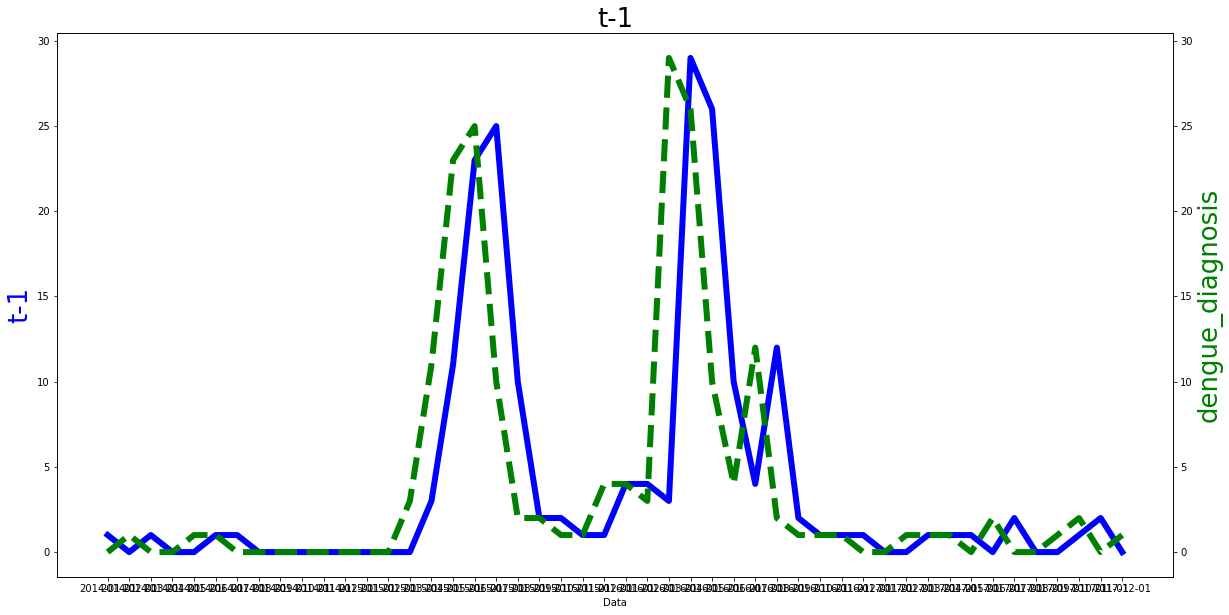

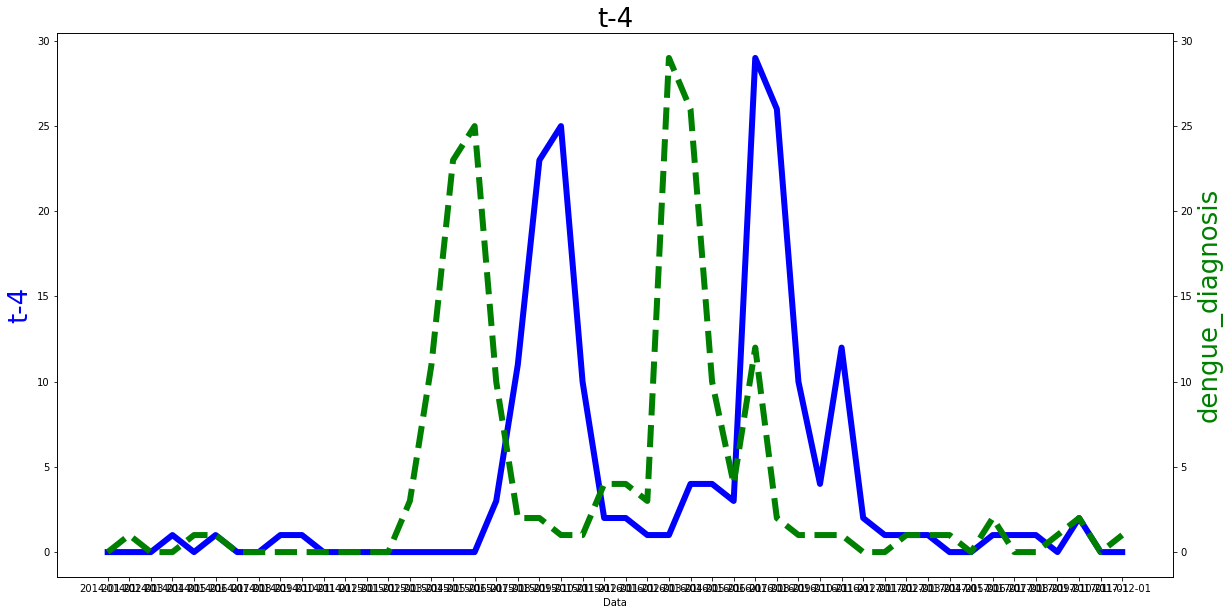

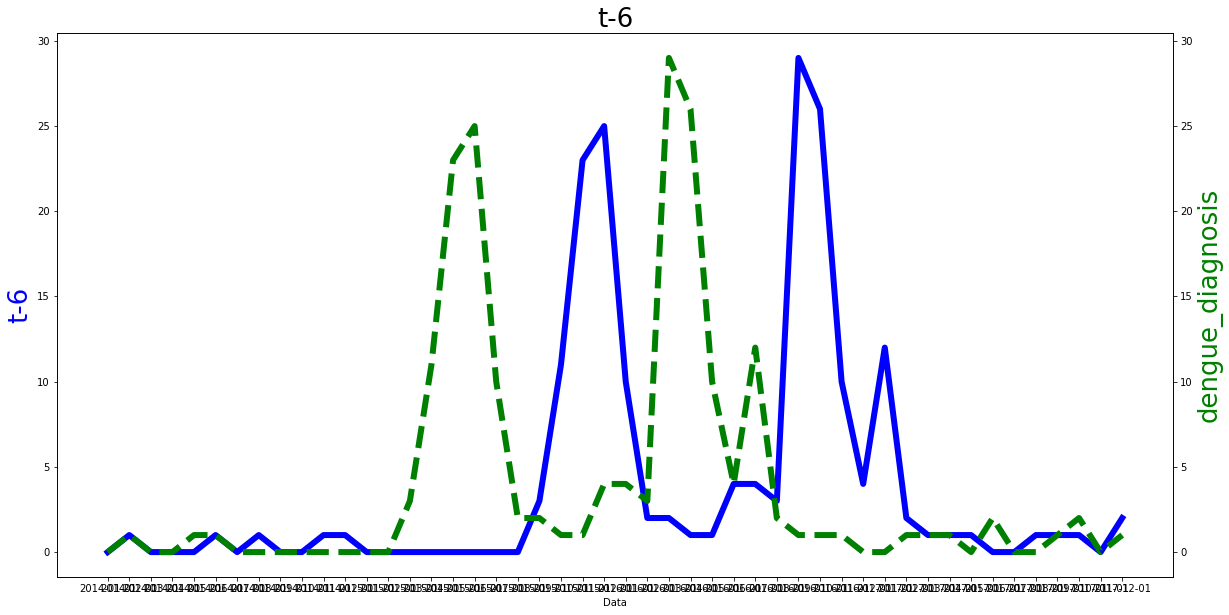

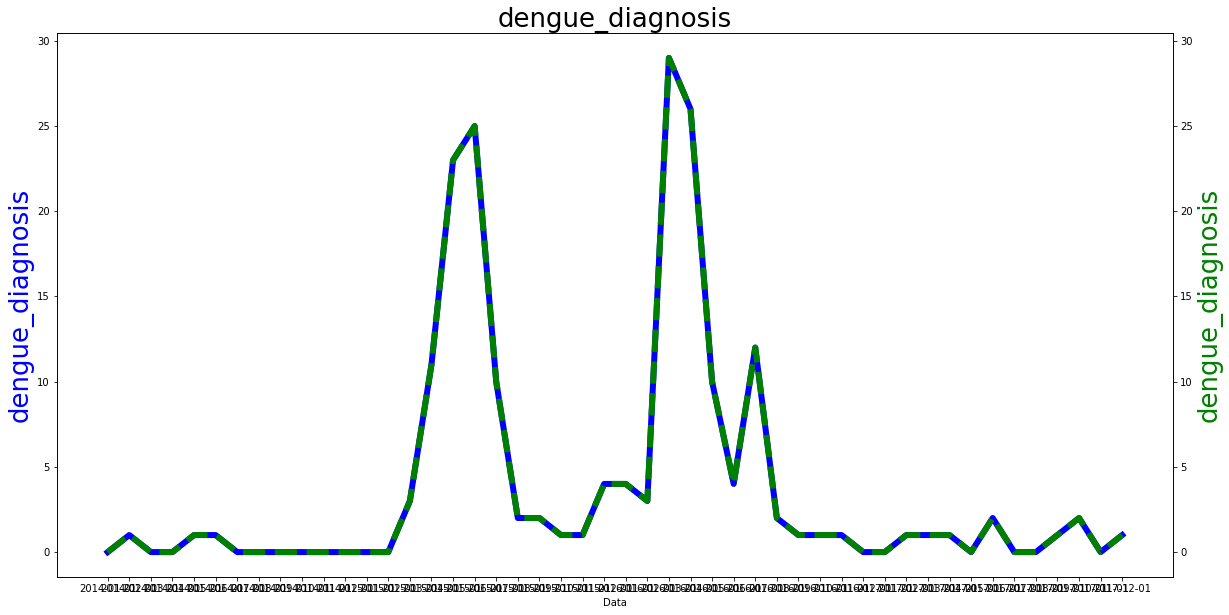

In [21]:
cidade_a = "Complexo Do Alemão"
cidade_b = "Botafogo"

df = df_geral[df_geral['nome_bairro'] == cidade_a]

for c in list(df.columns):
    if not c in ["nome_bairro", "data", "mes"]:       
        fig, ax1 = plt.subplots(figsize=(20,10))

        ax2 = ax1.twinx()
        ax1.plot(df["data"], df[c], color="blue", linewidth=6)
        ax2.plot(df["data"], df["dengue_diagnosis"], color="green", linewidth=6, 
                 linestyle='--')

        ax1.set_xlabel('Data')
        ax1.set_ylabel(c, color='b', size=26)
        ax2.set_ylabel("dengue_diagnosis", color='g', size=26)
        ax1.set_title(c, size=26)

        plt.show()

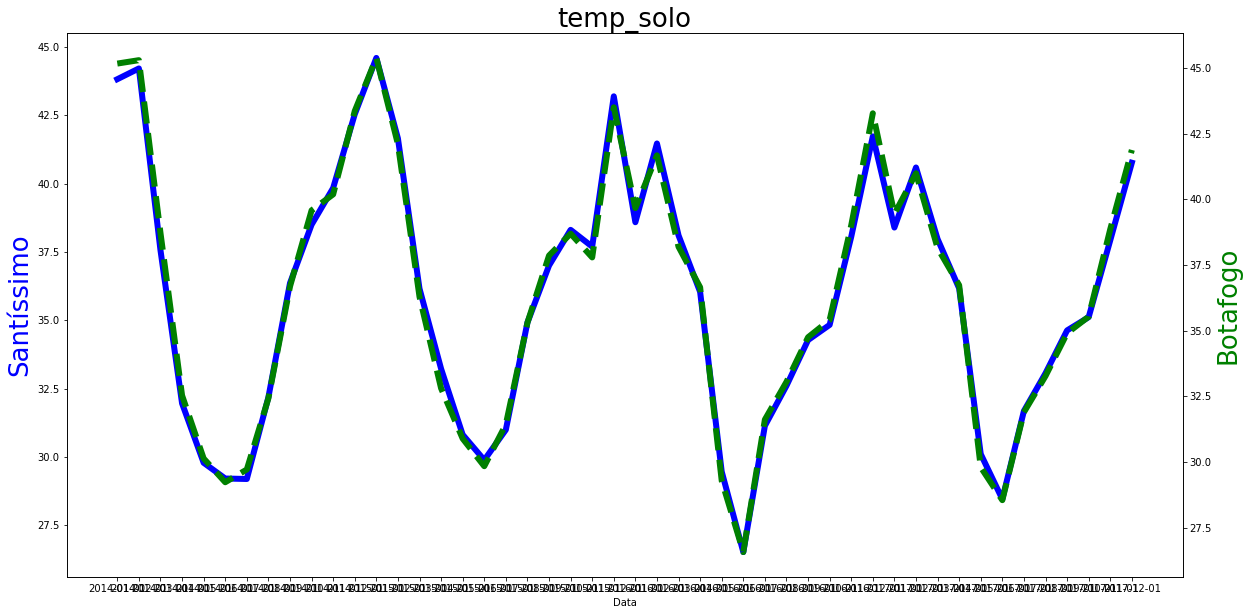

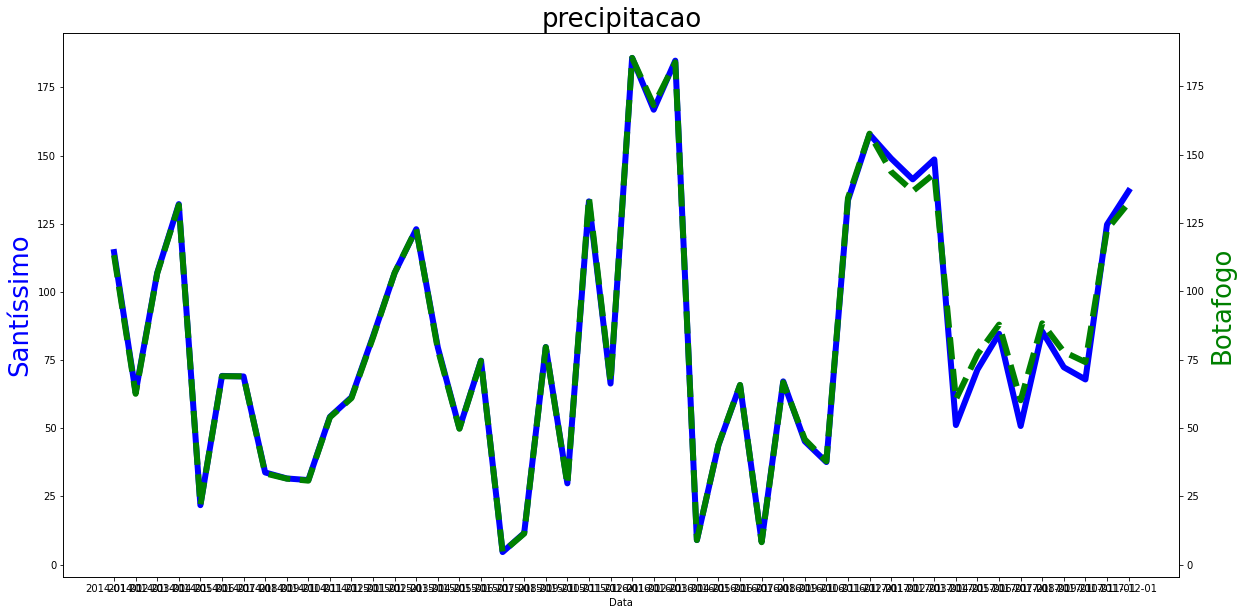

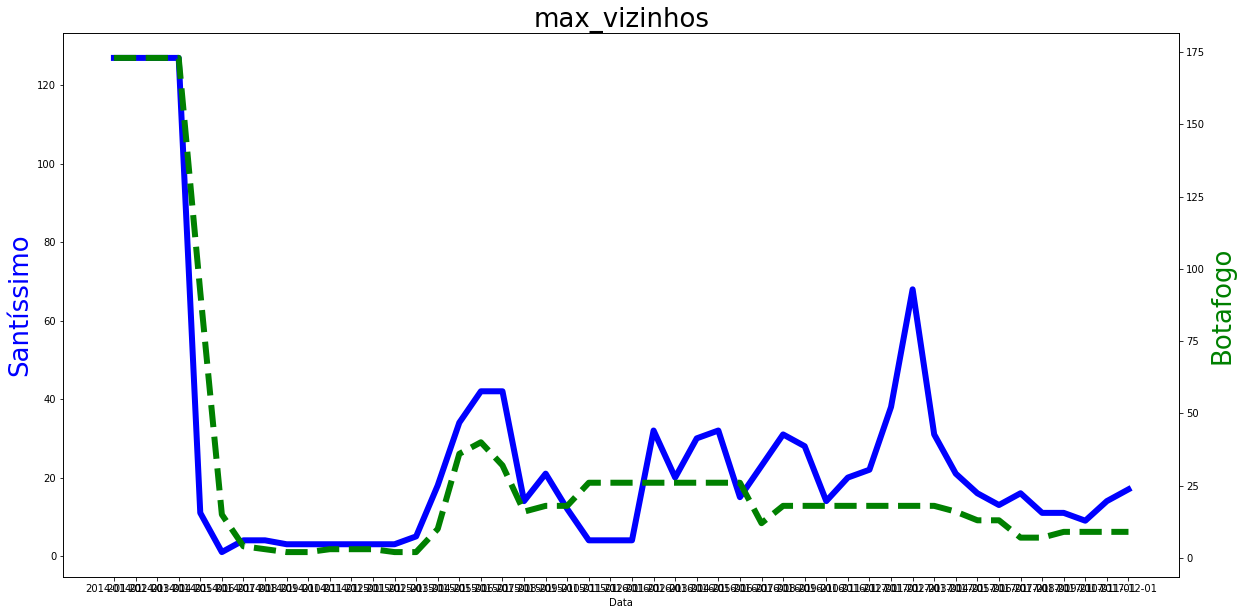

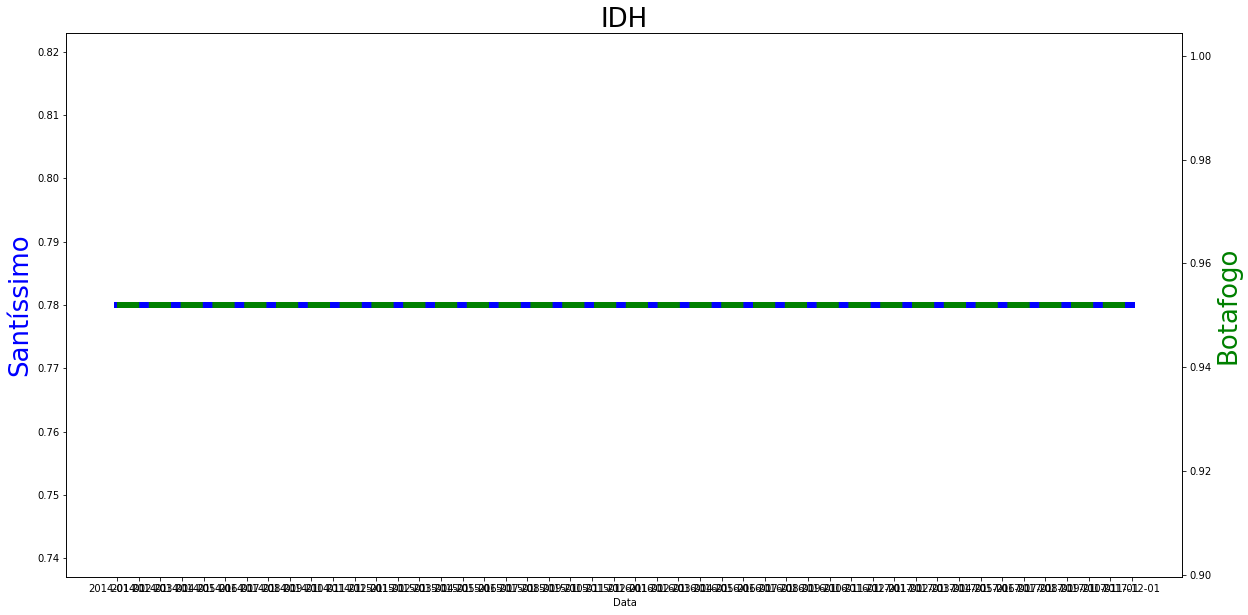

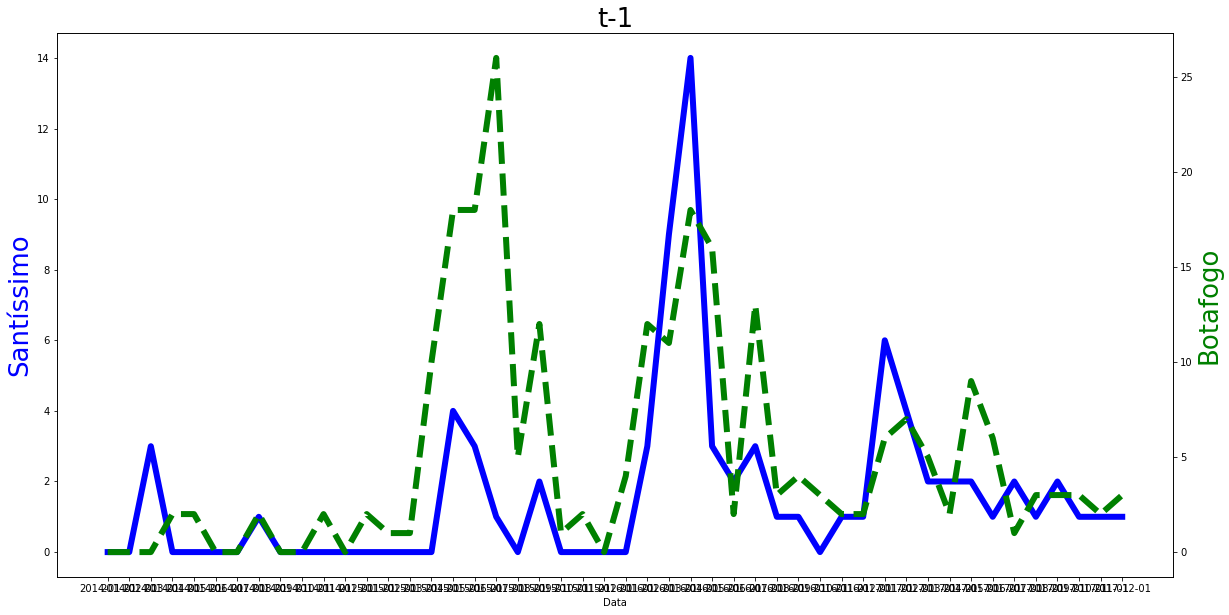

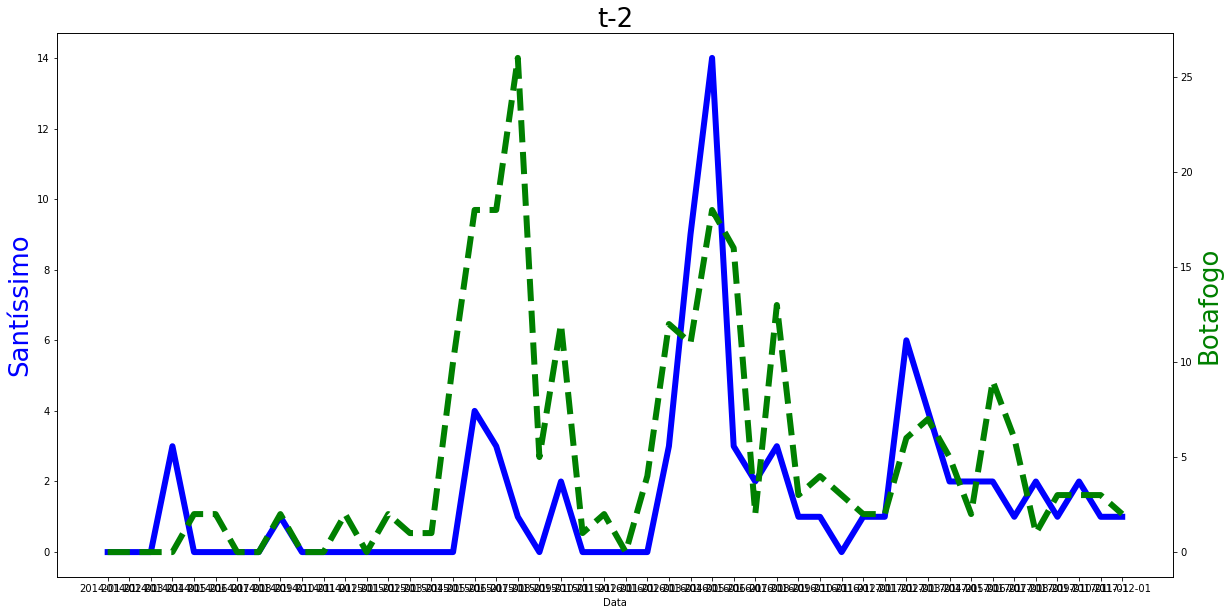

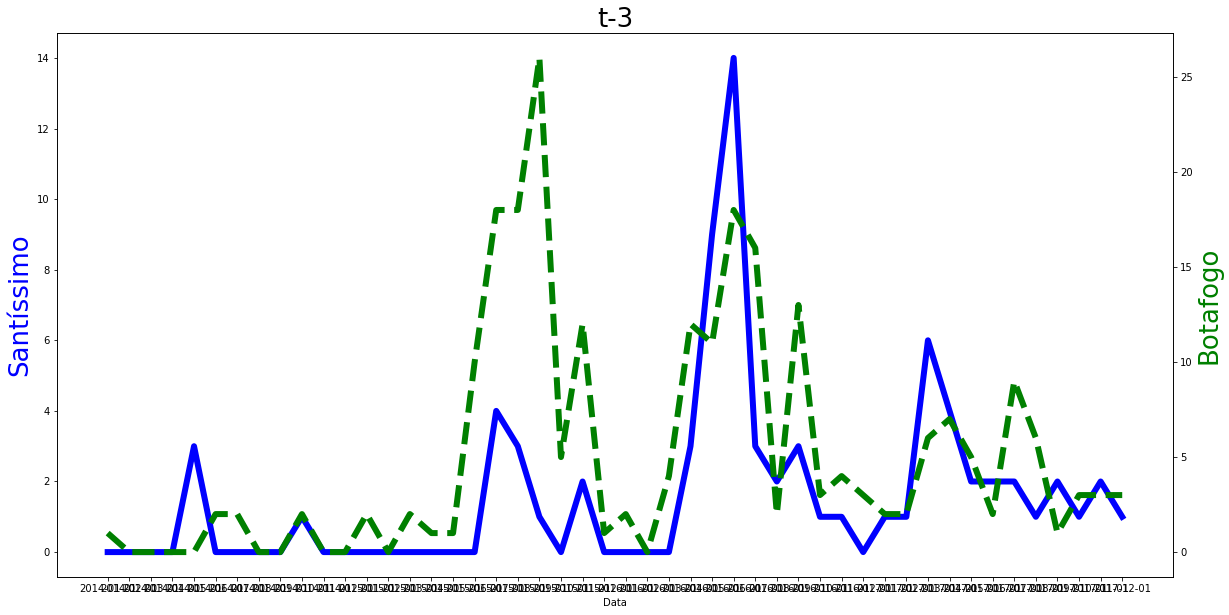

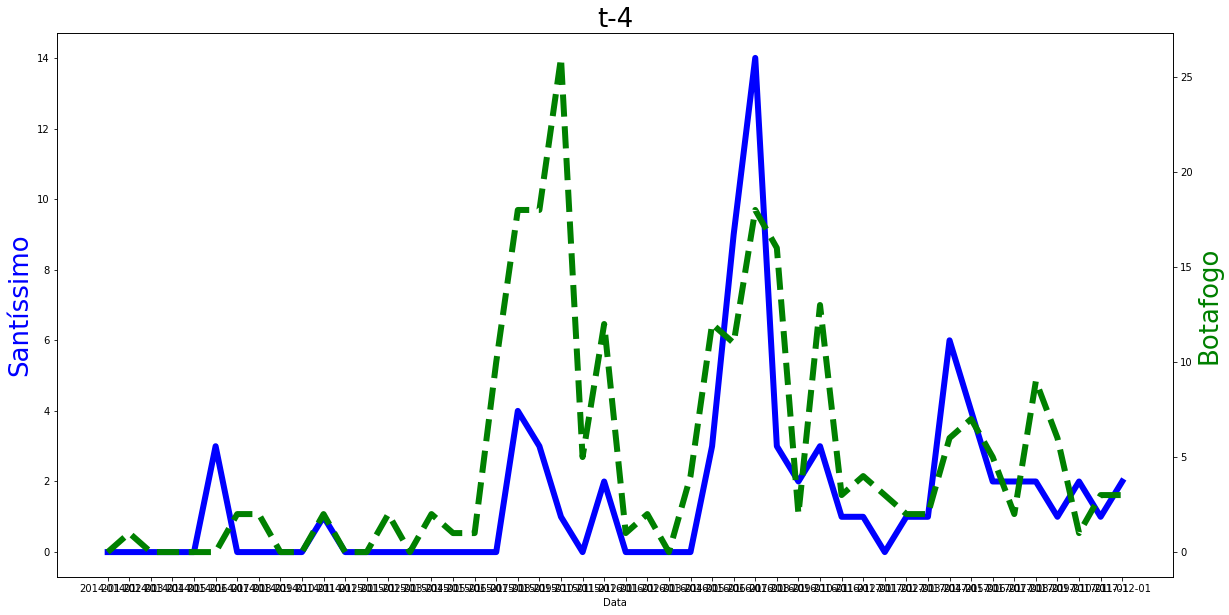

In [17]:
cidade_a = "Santíssimo"
cidade_b = "Botafogo"

for c in list(df.columns):
    if not c in ["nome_bairro", "data", "mes"]:       
        fig, ax1 = plt.subplots(figsize=(20,10))

        ax2 = ax1.twinx()
        ax1.plot(df["data"], df_geral[df_geral['nome_bairro'] == cidade_a][c], color="blue", linewidth=6)
        ax2.plot(df["data"], df_geral[df_geral['nome_bairro'] == cidade_b][c], color="green", linewidth=6, 
                 linestyle='--')

        ax1.set_xlabel('Data')
        ax1.set_ylabel(cidade_a, color='b', size=26)
        ax2.set_ylabel(cidade_b, color='g', size=26)
        ax1.set_title(c, size=26)

        plt.show()